___
# <center> Visualizing a Random Forest
___

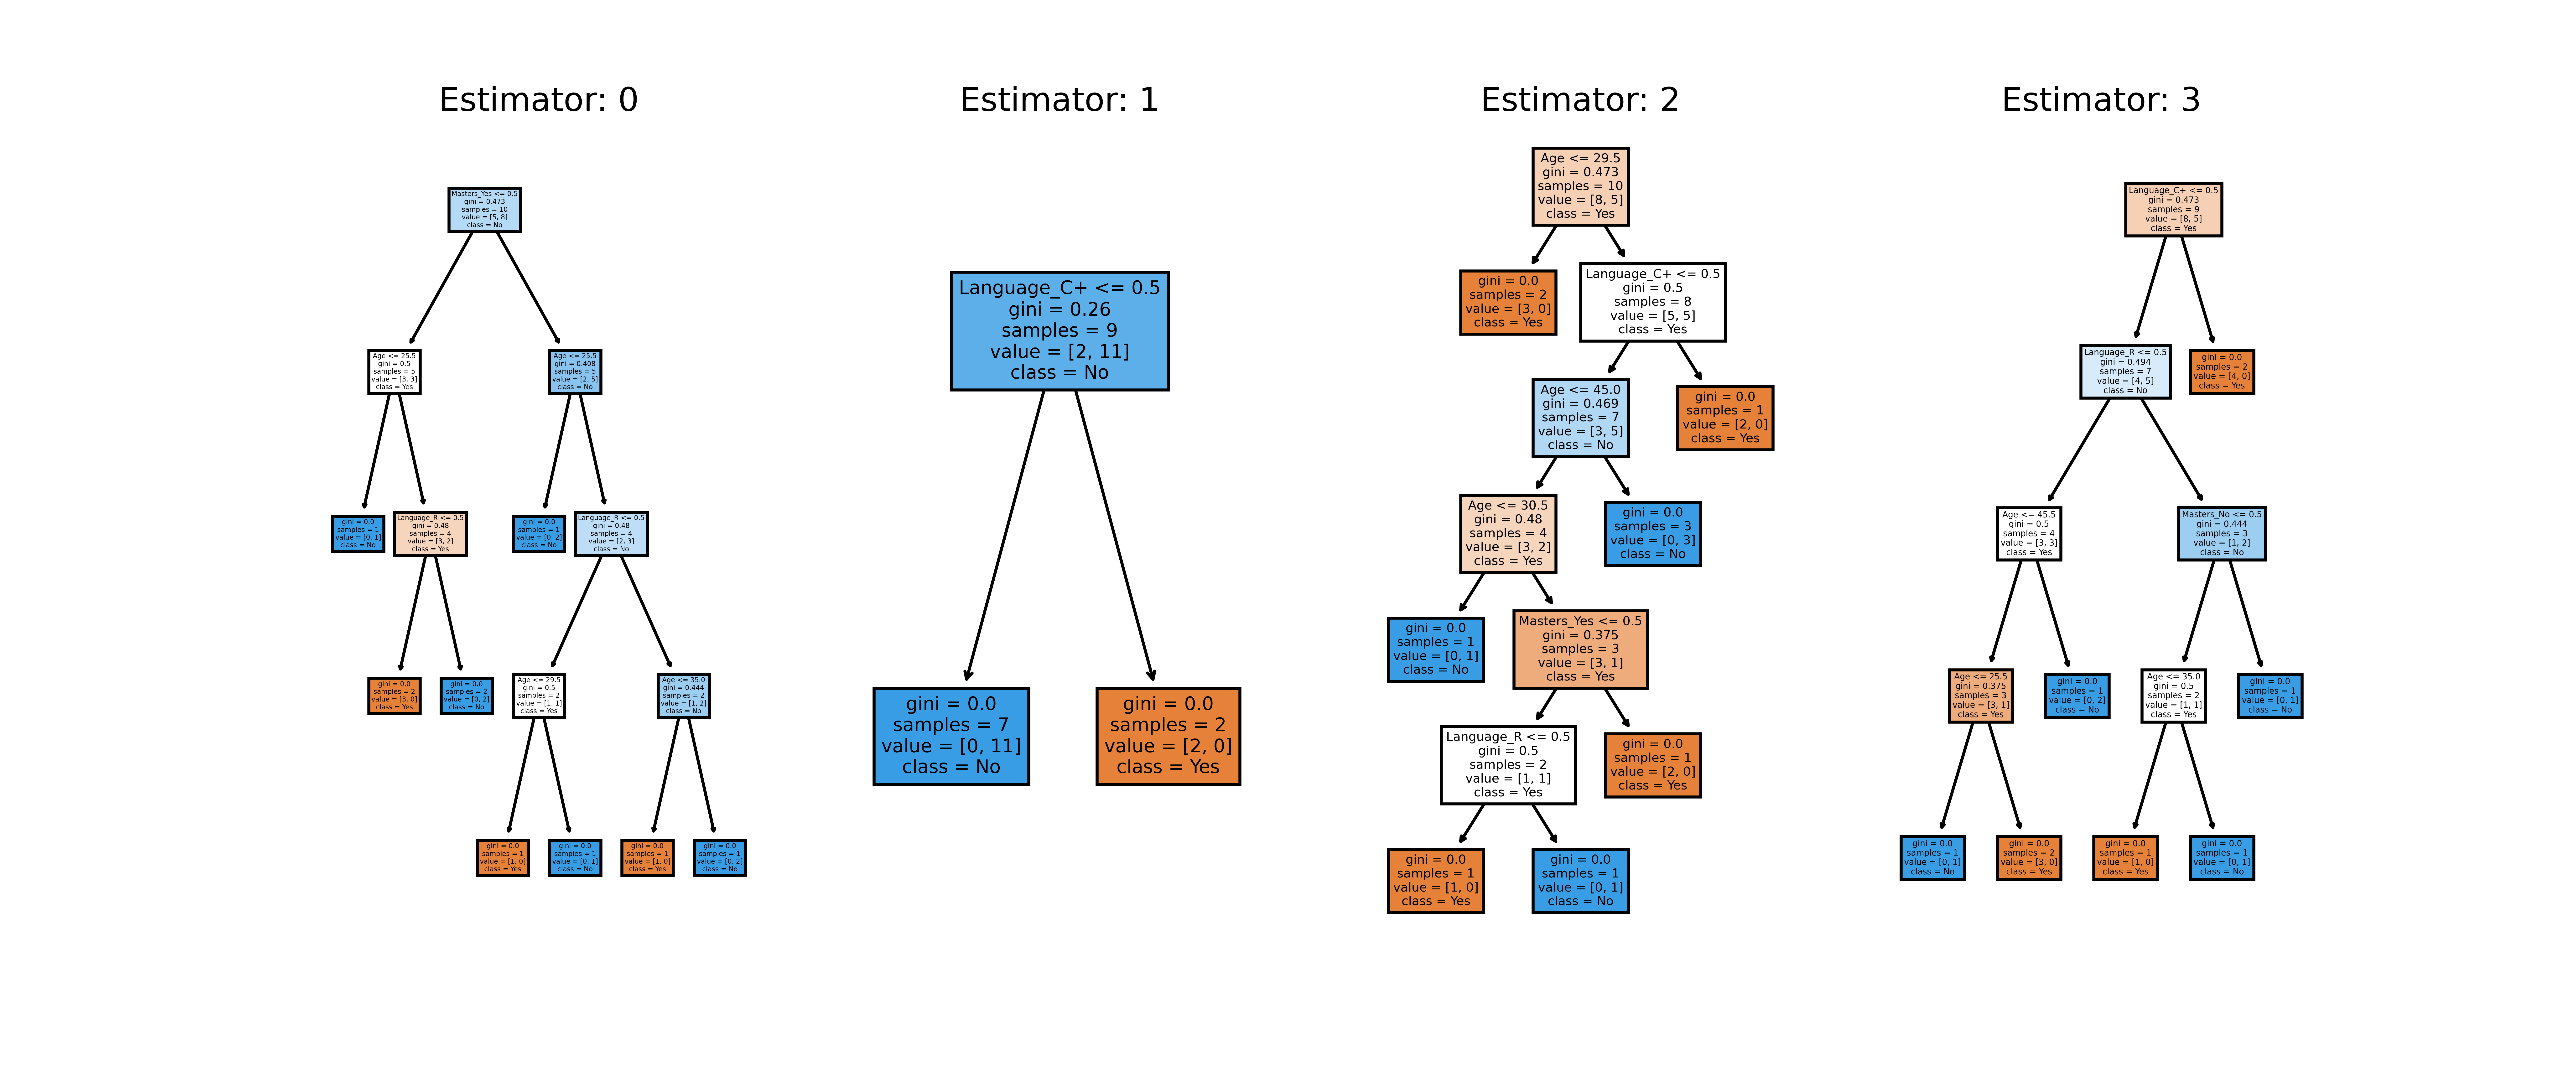

In [2]:
Image('ExampleRandomForest.png')

___
# <center> Ensemble Learning
___
1. If we aggregate predictions from a group of predictors, our predictions will frequently perform better than with the best individual predictor. 


2. A group of predictors is called an ensemble.


3. Ensemble methods work best when the predictors are independent from eachother so consider different algorithyms.

___
# <CENTER> Hard-Voting Classifier
An example is to train a few classifiers (knn, logistic reg, etc) and aggregate the predictions of each classifier and predict the class that gets the most votes.

___
# <center> Terminology

   - **Weak learner:** performs slightly better than guessing


   - **Strong learner:** has high accuracy
___

___
# <center> Problem with Decision Trees?

Decision Tree work great with the data used to create and train the model. However, they are inflexible when it comes to new data. 
___
    
1. When we think of a models inflexibility on unseen data we instantly know it will not generalize well. 
    - Low Bias
    - High variance
    
___

# <center> What is a Bootstrapped Dataset?
<center> Bootstrapping a dataset involves the random sampling of that dataset with replacement. 
    
___


 
- A Bootstrapped dataset contains multiple repeated entries from the original dataset.
    
    
- Subsequently, certain observations from the original dataset will not be selected.
  
#### <center> The observations from our original set that does not end up in the bootstraped set form our Out-of-Bag dataset.
    
___    
# <center> Out-of-Bag Dataset
<center> Typically a third of data sampled from our original set does not end up in the bootstraped set.
    
___

1. Similarly to determining a models accuracy on a testing set, we can use this Out-of-Bag data to test our RandomForest as "Unseen Data" and measure its accuracy by the proportion of correctly classified OOB samples
    
    
2. Our Out-of-Bag error is our proportion of wrong classifications  
___


# <center> Bagging
Bootstrapping our data and using the aggregate of our tally to make a decision is called bagging

1. We can train an ensemble of 500 Decision Tree classifiers using the BaggingClassifier which is roughly equivalent to our **RandomForest** class

___
# <center> Bootstrapping Dataset Example
___
#### <center> Data Scientist Job Acceptance Original Dataset 
$$\begin{array}{c|c}
  & Masters & Age & Language & Accepted\\
  \hline
 1 &Yes & 22  & Python & Yes\\ 
  \hline
2 & Yes & 57 & R &Yes\\  
  \hline
3 & No & 44 & Python &No\\
  \hline
 4& Yes & 29 & C+ & No\\
  \hline
5 & No & 32 & R &Yes\\ 
  \hline
6 & No & 24 & Python & Yes\\
    \hline
7 & No  & 27 & Python & No\\ 
  \hline
8 &   Yes & 30 & Python& Yes \\  
  \hline
9 &   Yes & 31 & R & No \\
  \hline
 10&   No  &50 & C+ & No\\
  \hline
11 &   No  &47 & Python & Yes \\ 
  \hline
 12&   Yes & 39 & R & Yes\\  
  \hline
13 &   No & 46 & R & Yes
 \end{array}$$ 
___

#### <center> Data Scientist Job Acceptance Bootstrapped Dataset
$$\begin{array}{c|c}
  & Masters & Age & Language & Accepted\\
  \hline
6 & No & 24 & Python & Yes\\
  \hline
11 &   No  &47 & Python & Yes \\  
  \hline
7 & No  & 27 & Python & No\\ 
  \hline
5 & No & 32 & R &Yes\\ 
  \hline
8 &   Yes & 30 & Python& Yes \\   
  \hline
8 &   Yes & 30 & Python& Yes \\  
    \hline
2 & Yes & 57 & R &Yes\\ 
  \hline
 1 &Yes & 22  & Python & Yes\\ 
  \hline
 12&   Yes & 39 & R & Yes\\ 
  \hline
7 & No  & 27 & Python & No\\ 
  \hline
2 & Yes & 57 & R &Yes\\  
  \hline
3 & No & 44 & Python &No\\ 
  \hline
 10&   No  &50 & C+ & No
 \end{array}$$ 
    
___

#### <center> Data Scientist Job Acceptance Out-of-Bag Dataset
$$\begin{array}{c|c}
  & Masters & Age & Language & Accepted\\
  \hline
 4& Yes & 29 & C+ & No\\
  \hline
9 &   Yes & 31 & R & No \\  
  \hline
13 &   No & 46 & R & Yes
 \end{array}$$ 

___
# <center> Decision Tree Refresher

## <center> How Do We Decide Which Variable To Use for Our Nodes?
    
___  
## <center> Classification: Gini Impurity 

$$Gini = 1 - \sum_{k=1}^{n}(p_{i,k})^{2}$$

$$$$
<center> $p_i,k$ is the ratio of class k instances among the training instances in the $i^{th}$ node.
    
___
#### <center> Scikit-Learn uses the Classification And Regression Tree (CART) algorithm to train Decision Trees 

This algorithym searches for the pair (k, tk) that produces the purest subsets (weighted by their size). The cost function that the algorithm tries to minimize is as follows:
    
    
$$J(k,t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$$

___
$G_{left/right}$ measures the impurity of the left/right subset,
    
$m_{left/right}$ is the number of instances in the left/right subset.
___

    
## <center> Regression: MSE/Sum of Residuals 
$$J(k,t_k) = \frac{m_{left}}{m}MSE_{left} + \frac{m_{right}}{m}MSE_{right}$$

where: 
$$MSE_{node} = \sum_{i \in node} (\hat{y}_{node} - y^{(i)})^2$$ 
$$\hat{y}_{node} = \frac{1}{m_{node}}\sum_{i \in node} (y^{(i)})$$ 

___
___
# <center> Building A Random Forest
___
### <center> *Step One*:
1. Create a Decision Tree with our bootstrapped dataset.
 
    
2. To get more variability in our trees, only consider a random subset of explanatory variables at each step. 
    
    - For example, Instead of all 3 columns above we will only consider two (Masters, Language) using our CART algorithm to select our node variables.


___
#### <center> Data Scientist Job Acceptance Bootstrapped Dataset
$$\begin{array}{c|c}
  & Masters & Age & Language & Accepted\\
  \hline
6 & No & 24 & Python & Yes\\
  \hline
11 &   No  &47 & Python & Yes \\  
  \hline
7 & No  & 27 & Python & No\\ 
  \hline
5 & No & 32 & R &Yes\\ 
  \hline
8 &   Yes & 30 & Python& Yes \\   
  \hline
8 &   Yes & 30 & Python& Yes \\  
    \hline
2 & Yes & 57 & R &Yes\\ 
  \hline
 1 &Yes & 22  & Python & Yes\\ 
  \hline
 12&   Yes & 39 & R & Yes\\ 
  \hline
7 & No  & 27 & Python & No\\ 
  \hline
2 & Yes & 57 & R &Yes\\  
  \hline
3 & No & 44 & Python &No\\ 
  \hline
 10&   No  &50 & C+ & No
 \end{array}$$ 
    
___


### <center> Masters 
$$\begin{array}{c|c}
  Master & Yes & No & Instances \\
  \hline
  Yes & 6 & 0 & 6  \\ 
  \hline
  No & 3 & 4 & 7  
 \end{array}$$
___
#### <center> Gini Impurity
$$ \text{Master_Yes} = 1 - (\frac{6}{6+0})^{2} - (\frac{0}{6+0})^{2}$$  
  
$$ GR = 0 $$  
  
$$ \text{Master_No} = 1 - (\frac{3}{3+4})^{2} - (\frac{4}{3+4})^{2}$$  
  
  
$$ GL = 0.49$$  
___
#### <center> Weighted Average    
$$J(k,t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$$    
$$\frac{6}{7+6}0 + \frac{7}{7+6}0.49$$  
___
$$= 0.26 $$    
    
___    
    
### <center> R 
$$\begin{array}{c|c}
  R & Yes & No & Instances \\
  \hline
  Yes & 4 & 0 & 4  \\ 
  \hline
  No & 5 & 4 & 9  
 \end{array}$$
___
#### <center> Gini Impurity
$$ R = 1 - (\frac{4}{4+0})^{2} - (\frac{0}{4+0})^{2}$$  
  
$$ GR = 0 $$  
  
$$ Other = 1 - (\frac{5}{5+4})^{2} - (\frac{4}{5+4})^{2}$$  
  
  
$$ GL = 0.49$$  
___
#### <center> Weighted Average    
$$J(k,t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$$    
$$\frac{4}{4+9}0 + \frac{9}{4+9}0.49$$  
___
$$= 0.34 $$    
    
___    
    

___
## <center> Root Node Example Using Gini Impurity
    
1. We can see that Masters did the best in separating the samples.
    
    
2. We would then split the samples at the left and right node by randomly selecting 2 new columns and so on
    
    
3. Therefore, we build our tree as usual but only consider a random subset of columns at each split.

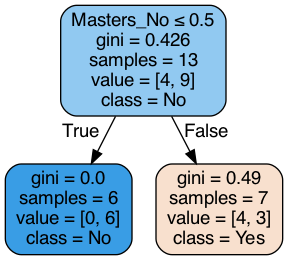

In [26]:
Image('RFrootNode.png')

___
# <center> Building A Random Forest
___
## <center> *Step Two*:   
1. Repeat steps one n number of times to build a forest of decision trees.
    
    - Each new tree will thus consider different variables at each step and this will result in a greater variability in our forest of trees.

___
# <center> Visualizing a Random Forest

- We can visualize all the estimators (decision trees) from a random forest. The Image below visualizes the first 4 from the random forest model fit above.
    
    
- The variety of trees makes RF more effective than DT
    
 

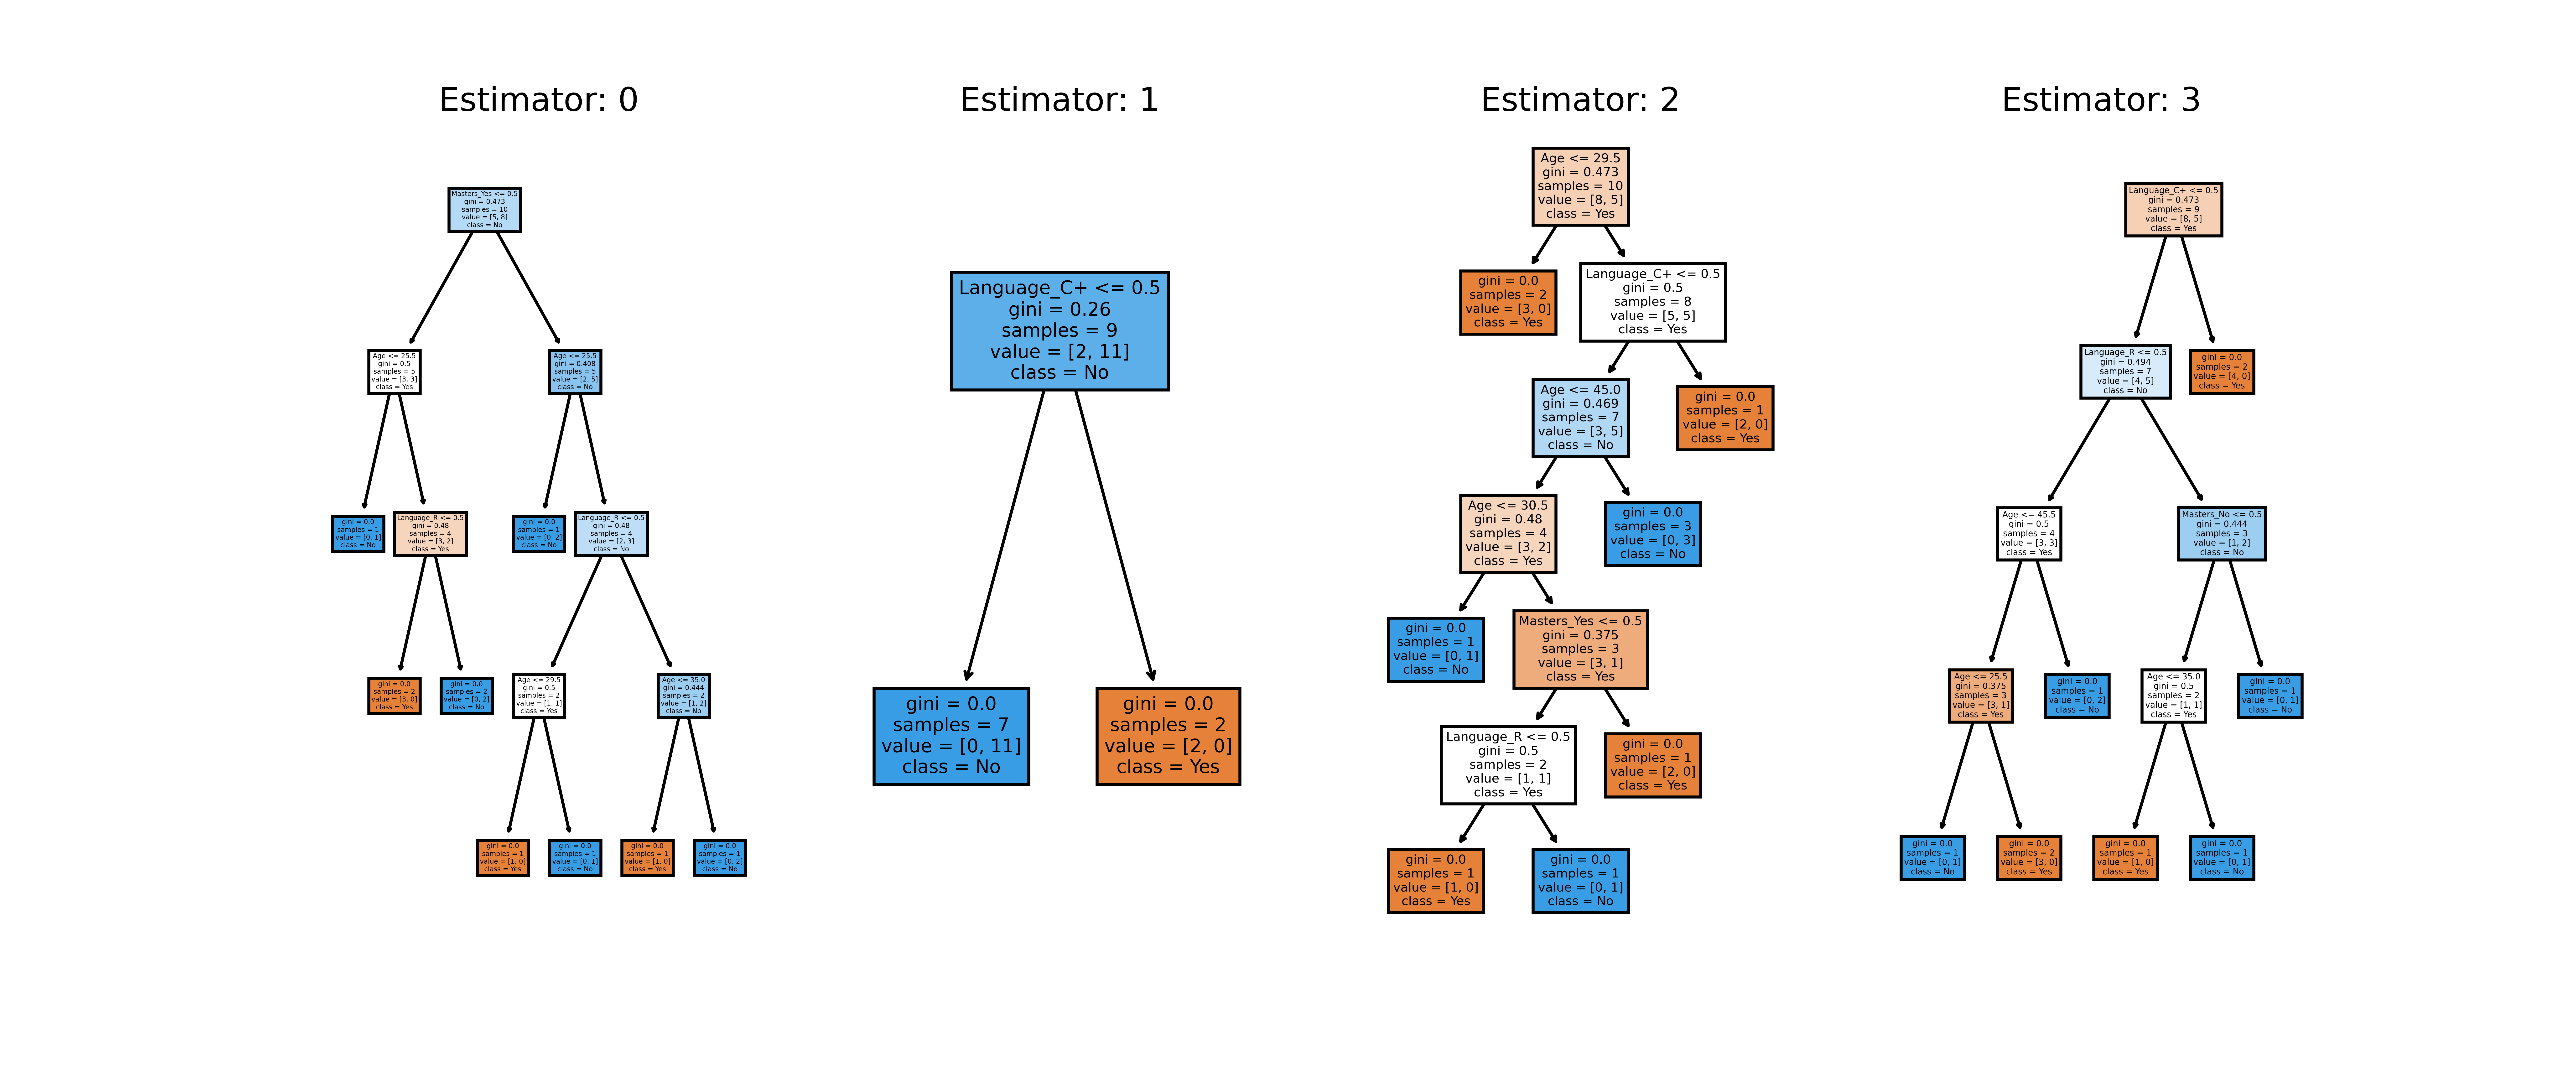

In [48]:
Image('ExampleRandomForest.png')

___
# <center> Building A Random Forest
___
### <center> *Step Three*: 
    
Estimate the accuracy of the random forest:
   - We can now use our Out-of-Bag data as "Unseen Data" to test our RandomForest and measure its accuracy by the proportion of correctly classified OOB samples.
    
    
   - Our Out-of-Bag error is our proportion of wrong classifications.
    
    
   - We can no go back to step one bulding a random Forest and instead of using two random columns we can compare the Out-of-Bag error for different number of variables per step. 

    
___
# <center> Building A Random Forest
### <center> *Step Four*: 
    
Select most accurate random forest based upon Out-of-Bag error.
___

___ 
# <center> Prediction
<center> <center> Similar to decision trees, we run our new input observations down each individual decision tree within the forest and tally the leaf node class prediction i.e, 'Yes' or 'No. In the case of Regression we just take the average of all the output leaves our observation ended up in.
    
___
## <center> Given the Data Below Was the Peraon Accepted
___
#### <center> Run the data through the the forest of trees
$$\begin{array}{c|c}
  Masters & Age & Language & Accepted\\
  \hline
  No & 32 & Python & ?\\ 
 \end{array}$$ 
    
___

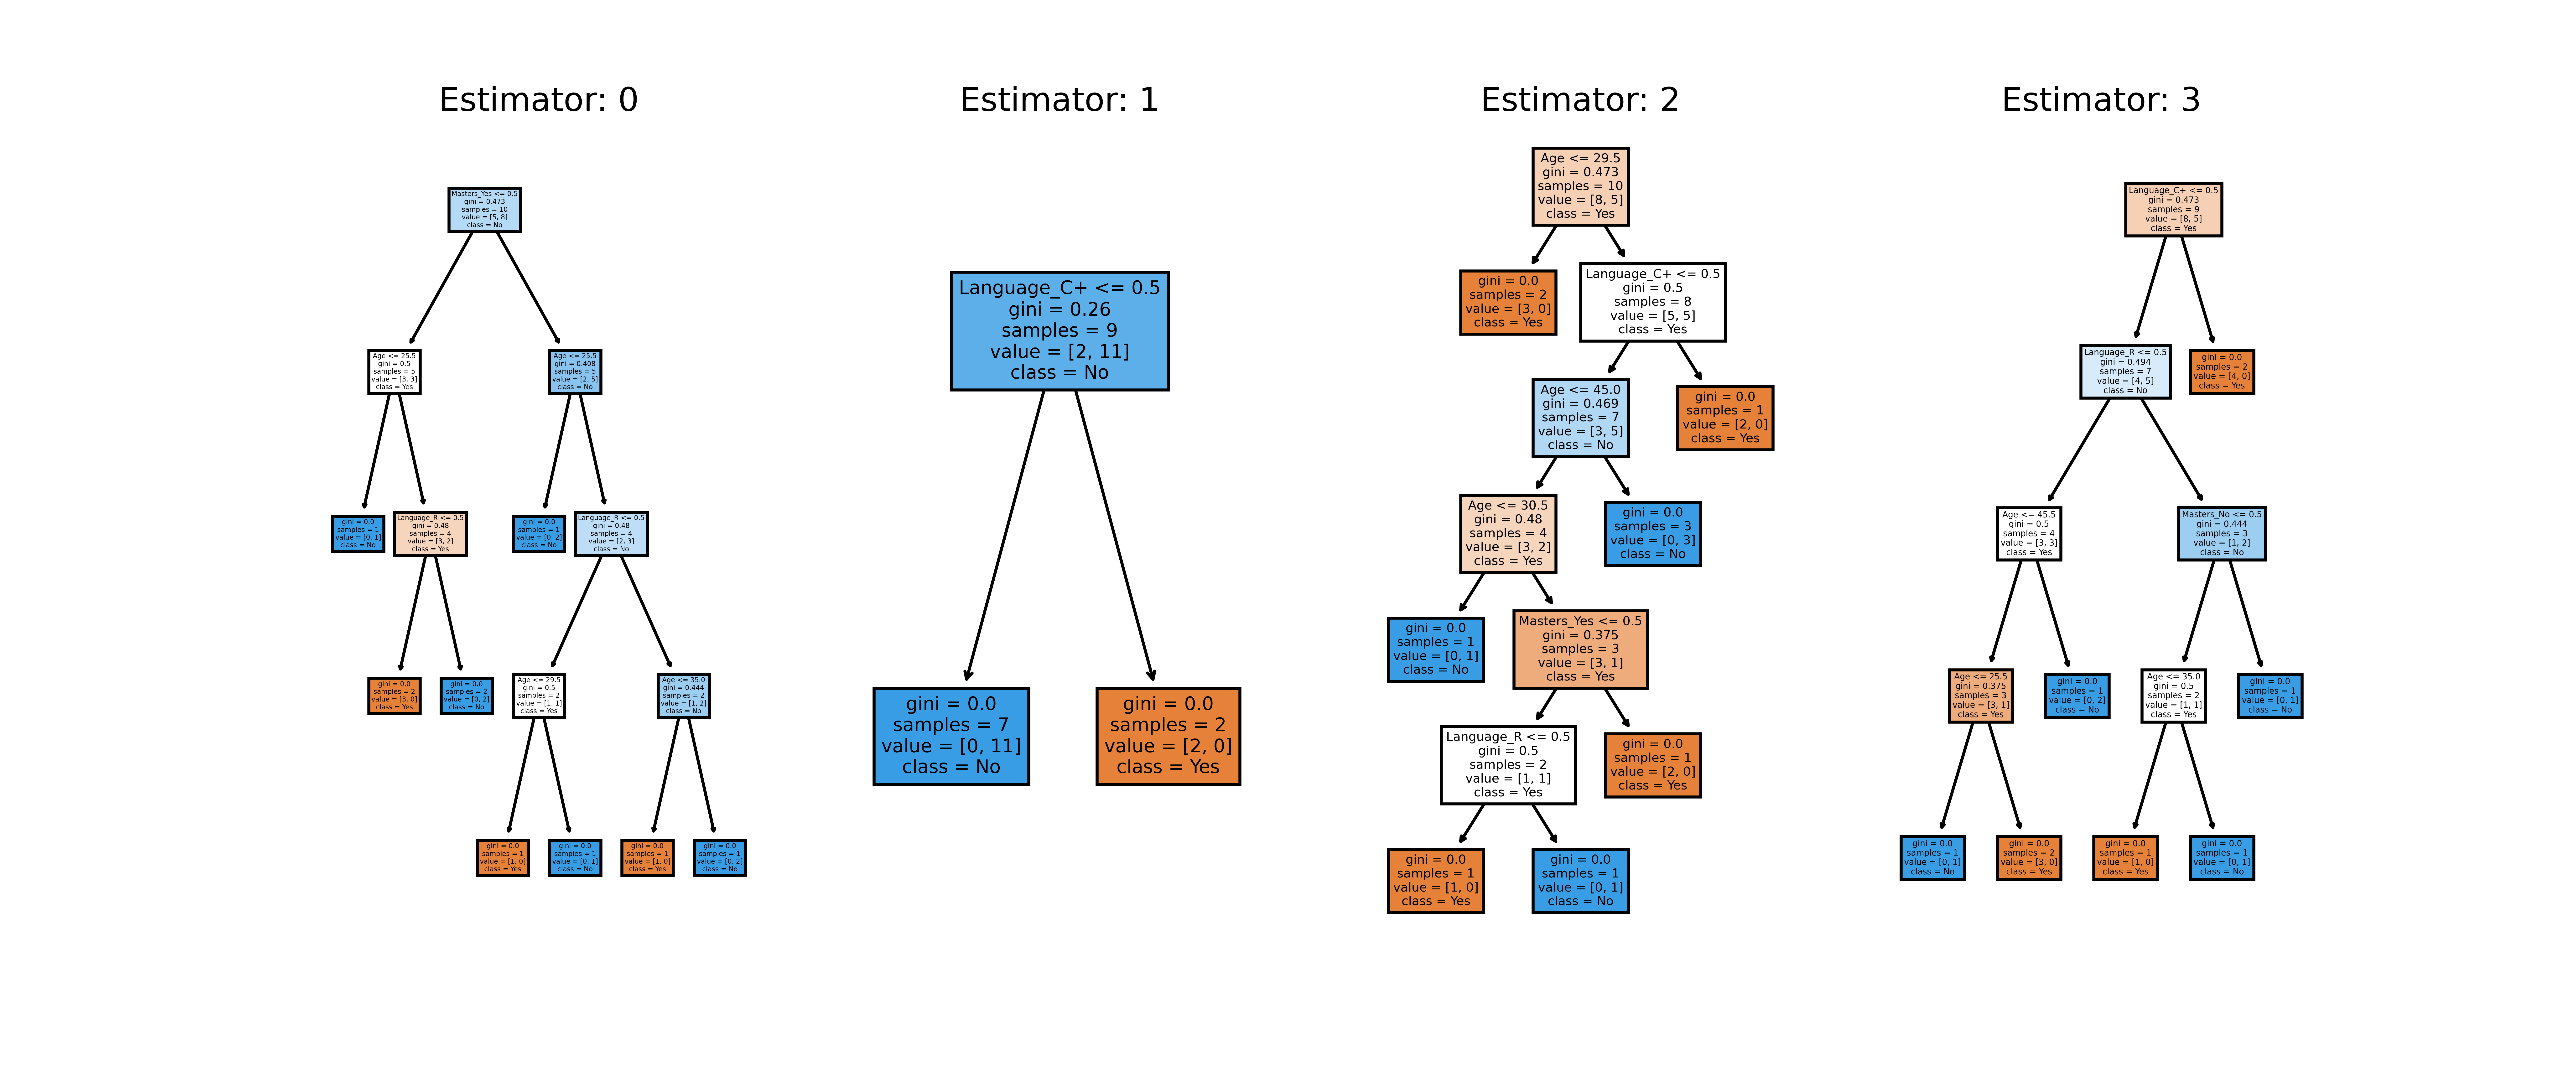

In [3]:
Image('ExampleRandomForest.png')

 ___
# <center> Appendix
___  
**Libraries**
```
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
import matplotlib.lines as mlines
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import pandas as pd
import scipy
from IPython.display import display
from IPython.display import Image
from sklearn.datasets import make_regression
from sklearn import tree
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from mlxtend.plotting import plot_decision_regions
```
    
**Dataset**:
```
#create dataset
boost_classifier = pd.DataFrame({'Masters':['Yes','Yes','No','Yes','No','No','No','Yes','Yes','No','No','Yes','No'],
                                 'Age':[22,57,44,29,32,24,27,30,31,50,47,39,46], 
                          'Language': ['Python','R','Python','C+','R','Python','Python','Python','R','C+','Python','R','R'],
                                 'Accepted': [1,1,0,0,1,1,0,1,0,0,1,1,1]})

#set seed
np.random.seed(40)

#random sampling with replacement
bootstrapped = boost_classifier.sample(replace = True, n =13)

#out-of-bag
ofb = boost_classifier[~boost_classifier.index.isin(bootstrapped.index)]
```
**Root Node**:
```
#create dataset
bootstrapped = pd.DataFrame({'Masters':['No','No','No','No','Yes','Yes','Yes','Yes','Yes','No','Yes','No','No'],
                                 'Age':[24,47,27,32,30,30,57,22,39,27,57,44,50], 
                          'Language': ['Python','Python','Python','R','Python','Python','R','Python','R','Python','R','Python','C+'],
                                 'Accepted': [1,1,0,1,1,1,1,1,1,0,1,0,0]})
subset_split = bootstrapped[['Masters','Language','Accepted']]
dummy_subset = pd.get_dummies(subset_split)

#Visualize Tree
X = dummy_subset.drop(['Accepted'],axis =1).values
y = dummy_subset['Accepted'].values

fn = dummy_subset.columns[1:]

clf = DecisionTreeClassifier(max_depth =1)
clf = clf.fit(X,y)

dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=fn,  
                     class_names=['Yes','No'],  
                     filled=True, rounded=True,  
                    special_characters=True)  
r = graphviz.Source(dot_data) 
r.format = 'png'
r.filename = 'RFrootNode'
r.render()
```
**RandomForest Forest**:
```

boost_classifier = pd.DataFrame({'Masters':['Yes','Yes','No','Yes','No','No','No','Yes','Yes','No','No','Yes','No'],
                                 'Age':[22,57,44,29,32,24,27,30,31,50,47,39,46], 
                          'Language': ['Python','R','Python','C+','R','Python','Python','Python','R','C+','Python','R','R'],
                                 'Accepted': [1,1,0,0,1,1,0,1,0,0,1,1,1]})

dummy_subset = pd.get_dummies(boost_classifier)

#Visualize Tree
X = dummy_subset.drop(['Accepted'],axis =1).values
y = dummy_subset['Accepted'].values

fn = dummy_subset.columns[[0,2,3,4,5,6]]
cn=['Yes','No']

clf = RandomForestClassifier()
clf = clf.fit(X,y)

fig, axes = plt.subplots(nrows = 1,ncols = 4,figsize = [12,5], dpi=900)
for index in range(0, 4):
    tree.plot_tree(clf.estimators_[index],
                   filled = True,
                   feature_names = fn, 
                   class_names=cn,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
    
fig.savefig('ExampleRandomForest.png')
```
**Voting Classifier**:
```
# Splitting our dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)


# We want to have three different classification algorithyms
logreg_clf = LogisticRegression()
random_clf = RandomForestClassifier()
svm_clf = SVC(probability =True)

# In our voting classifier we want to add our three classification algorithyms and have hard voting (most votes)
voting_clf = VotingClassifier(
estimators=[('lr', logreg_clf), ('rf', random_clf), ('svc', svm_clf)],
voting='soft')

# training on our dataset
voting_clf.fit(X_train, y_train)

# each individual accuracy from our three classifiers
for clf in (logreg_clf, random_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, round(accuracy_score(y_test, y_pred),2))
```
**Feature Importance**:
```
boost_classifier = pd.DataFrame({'Masters':['Yes','Yes','No','Yes','No','No','No','Yes','Yes','No','No','Yes','No'],
                                 'Age':[22,57,44,29,32,24,27,30,31,50,47,39,46], 
                          'Language': ['Python','R','Python','C+','R','Python','Python','Python','R','C+','Python','R','R'],
                                 'Accepted': [1,1,0,0,1,1,0,1,0,0,1,1,1]})

# Dummy Encoding
dummy_subset = pd.get_dummies(boost_classifier)

#Passing our x and y variables
X = dummy_subset.drop(['Accepted'],axis =1).values
y = dummy_subset['Accepted'].values

#Training our classifier
forest_clf = RandomForestClassifier(n_estimators=300, n_jobs=-1)
forest_clf.fit(X, y)
for name, score in zip(dummy_subset.columns[[0,2,3,4,5,6]],forest_clf.feature_importances_):
    print(name, score)
    
# We can see from our feature importance Age significantly stands out
```